In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd
df=pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Handling Missing Values**

In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)


<ipython-input-5-6d241fe6834b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-6d241fe6834b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df.drop('Cabin', axis=1, inplace=True)

# **Handling Categorical Values**

Label Encoding : for the attribute Sex,One hot encoding : for
 the attribute Embarked(Ordinal values)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


df = pd.get_dummies(df, columns=['Embarked'],dtype=int)

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,1,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 90.6+ KB


# **Feature Importance**

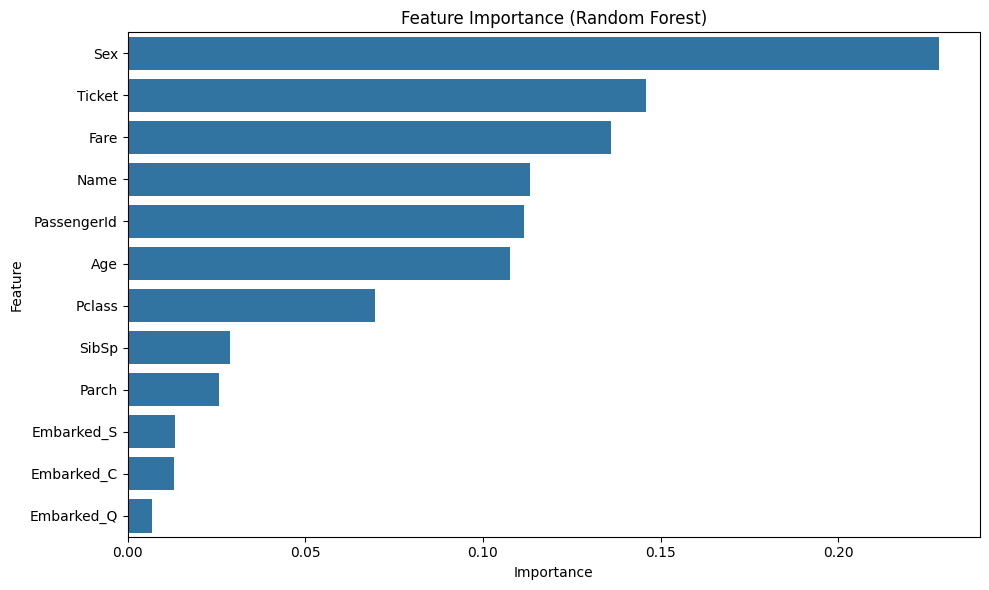

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode 'Ticket' and 'Name' (just for feature importance check)
df['Ticket'] = LabelEncoder().fit_transform(df['Ticket'])
df['Name'] = LabelEncoder().fit_transform(df['Name'])


X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    int64  
 11  Embarked_Q   891 non-null    int64  
 12  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [16]:
df.drop(['Name'], axis=1, inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,523,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,596,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,669,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,49,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,472,8.0500,0,0,1


# **Standardization**

In [18]:
from sklearn.preprocessing import StandardScaler


cols_to_scale = ['Age', 'Fare']


scaler = StandardScaler()


df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,1,0,523,-0.502445,0,0,1
1,2,1,1,0,0.663861,1,0,596,0.786845,1,0,0
2,3,1,3,0,-0.258337,0,0,669,-0.488854,0,0,1
3,4,1,1,0,0.433312,1,0,49,0.420730,0,0,1
4,5,0,3,1,0.433312,0,0,472,-0.486337,0,0,1


# **Outliers detection**

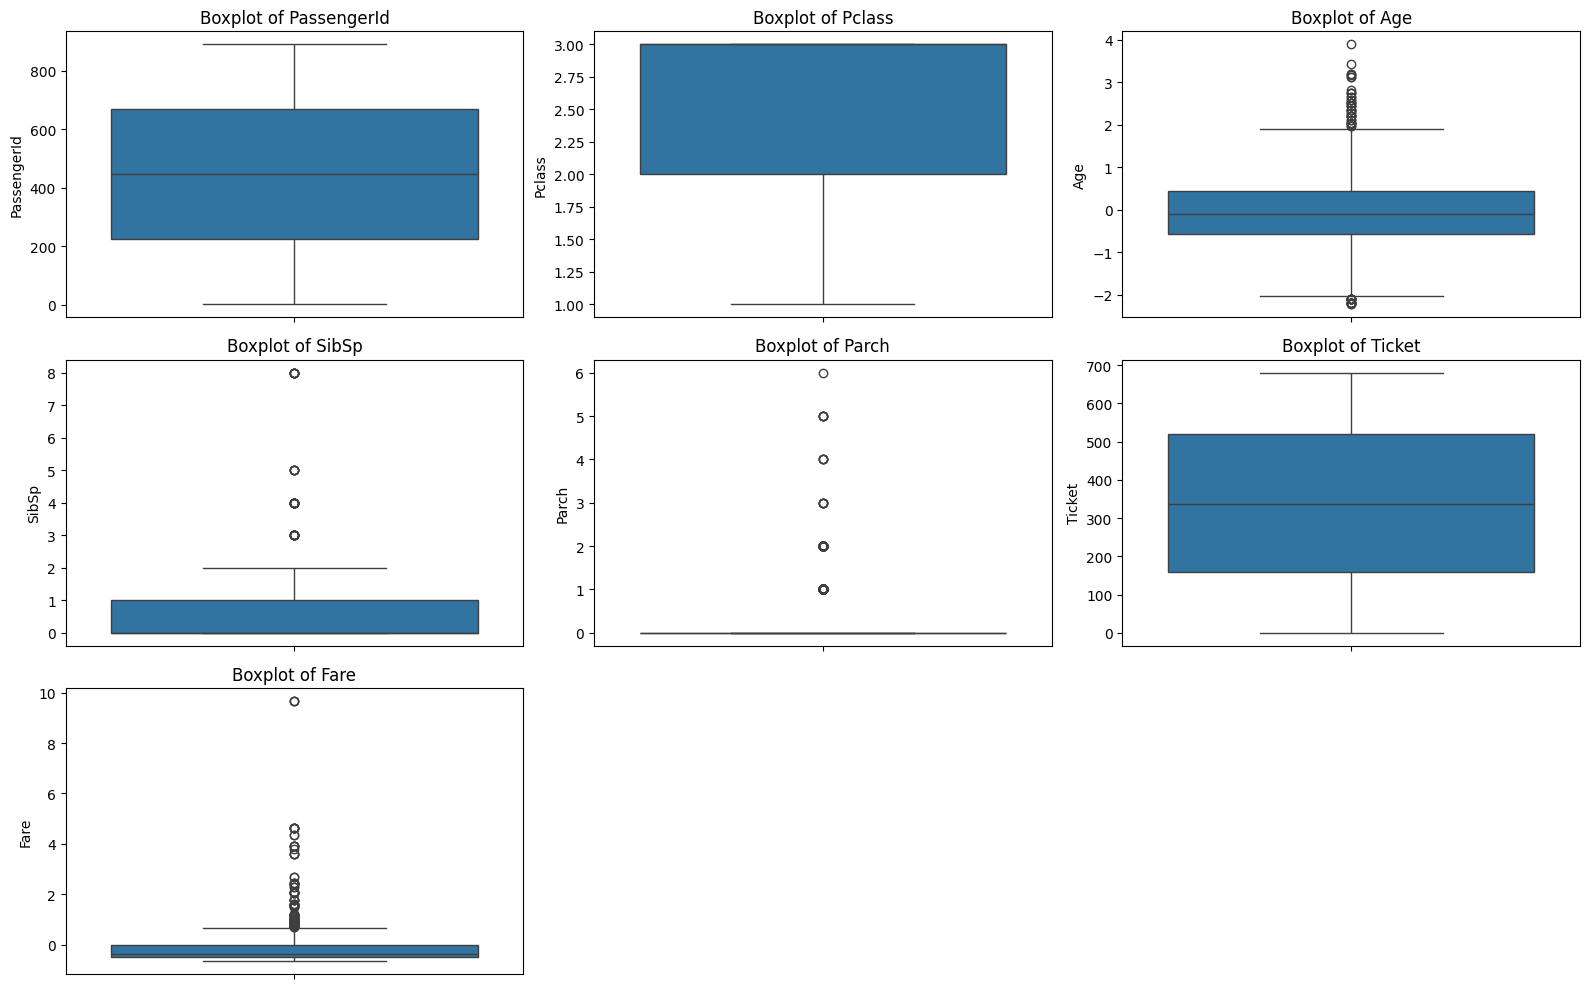

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']

# Plot boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


outliers found in Age,Parch,Sibsp and Fare

In [21]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_columns = ['Age', 'SibSp', 'Parch', 'Fare']


df_cleaned = remove_outliers_iqr(df, outlier_columns)

# Check new shape
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (891, 12)
After outlier removal: (561, 12)


# **Checking for imbalance**

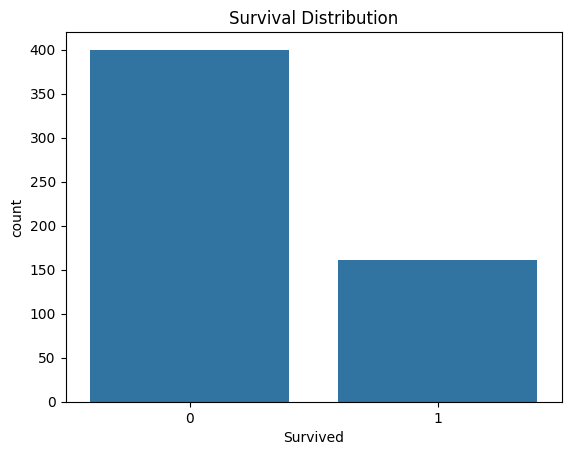

In [22]:
sns.countplot(x='Survived', data=df_cleaned)
plt.title("Survival Distribution")
plt.show()

In [23]:
df_cleaned.to_csv("cleaned_titanic_dataset.csv", index=False)

## **EDA** Task2

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,2.272780e-16,0.523008,0.381594,338.528620,3.987333e-18,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,200.850657,1.000562e+00,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,-2.224156e+00,0.000000,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,-5.657365e-01,0.000000,0.000000,158.500000,-4.891482e-01,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,-1.046374e-01,0.000000,0.000000,337.000000,-3.573909e-01,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,4.333115e-01,1.000000,0.000000,519.500000,-2.424635e-02,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,3.891554e+00,8.000000,6.000000,680.000000,9.667167e+00,1.000000,1.000000,1.000000


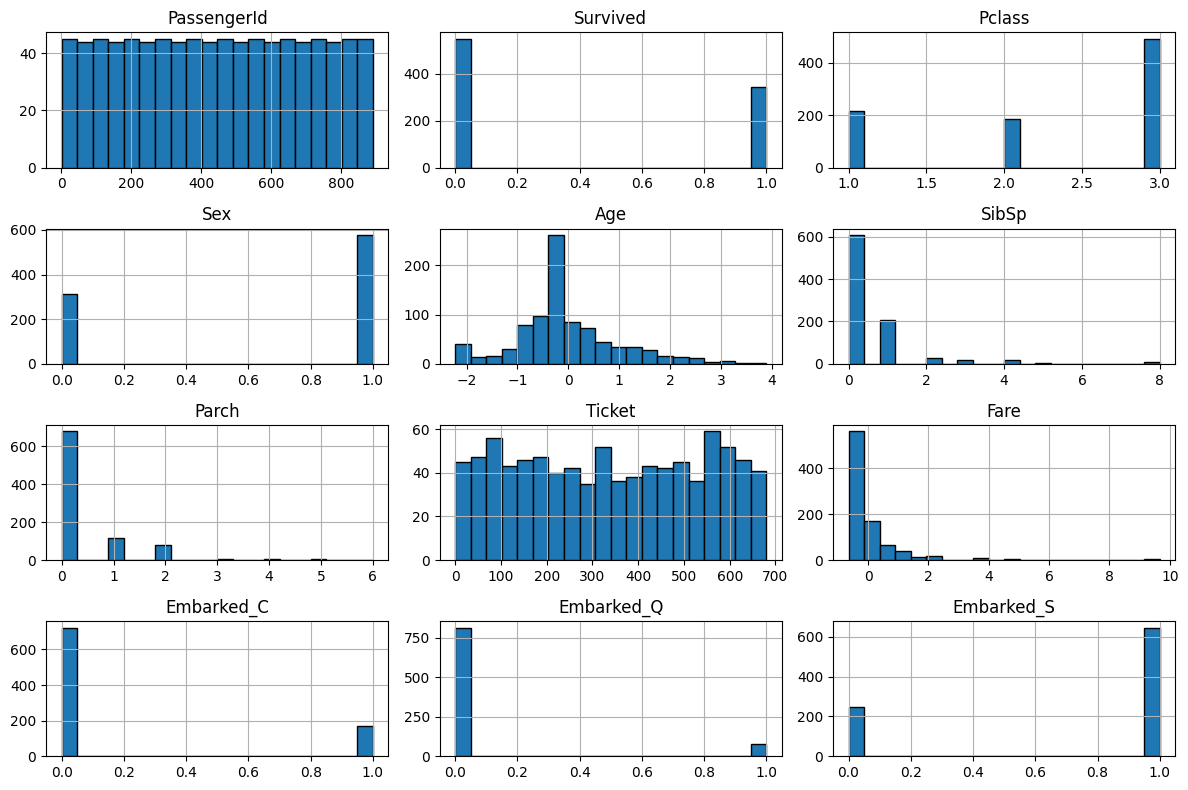

In [25]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,8), bins=20,edgecolor='black')
plt.tight_layout()
plt.show()

# **Inference:**
**Patterns/Insights:**

Survived : More 0s than 1s (imbalance)

Pclass : Most in 3rd class

Sex :	More males than females

Age : Younger passengers dominate

SibSp/Parch : Most passengers traveled alone

Fare: Most paid low fares; right-skewed

Embarked: Mostly from Southampton


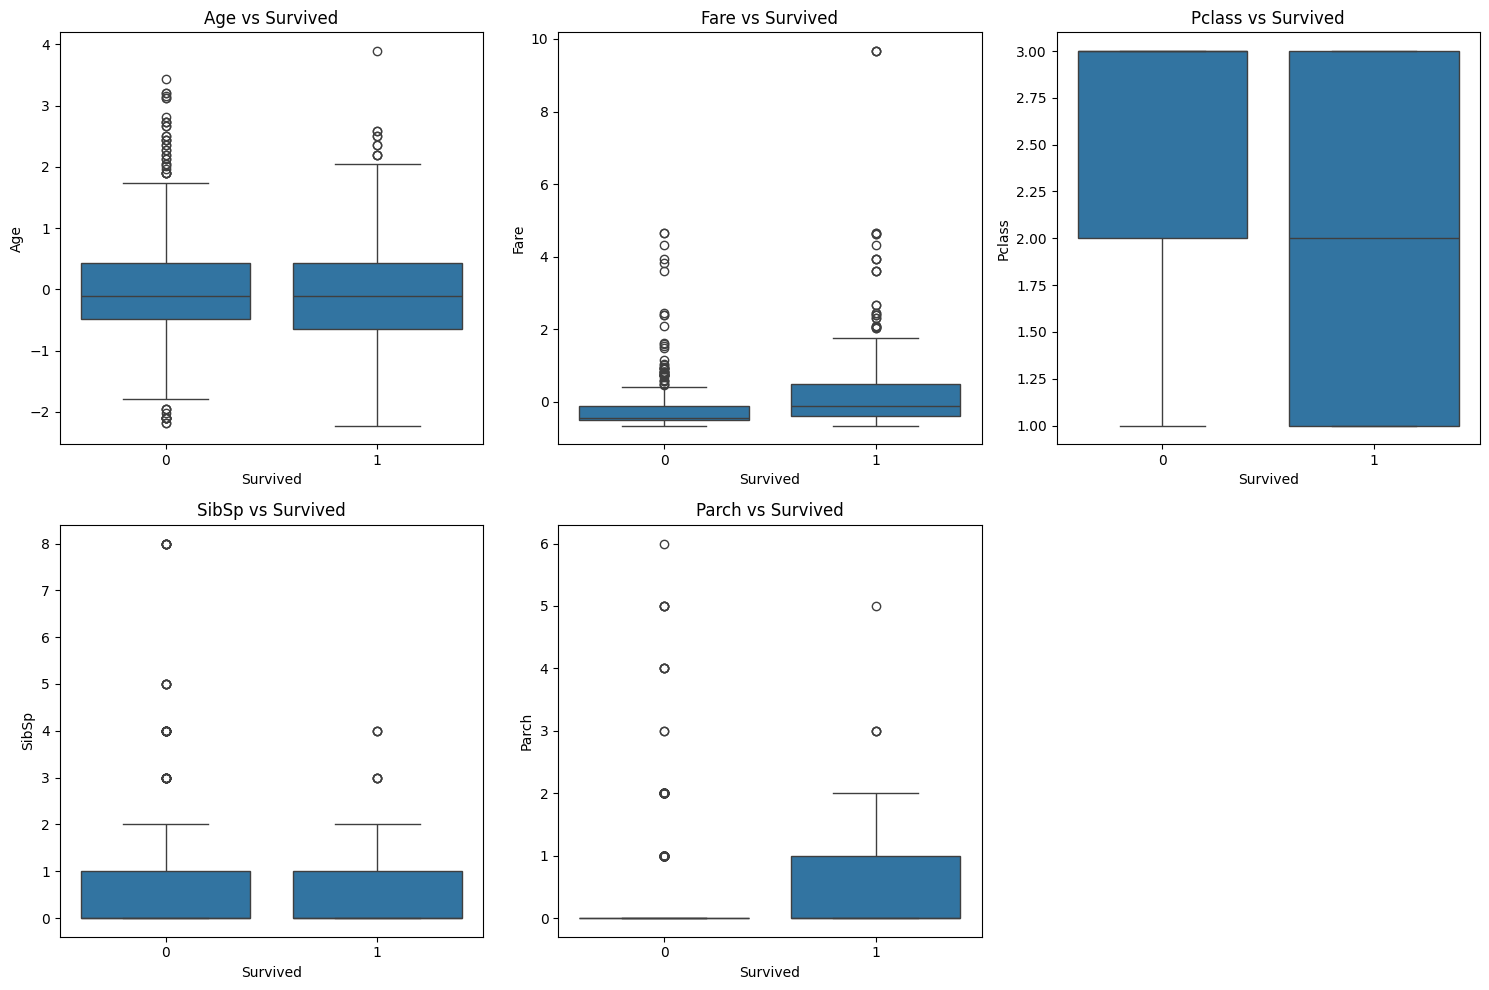

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Survived', y=feature, data=df)
    plt.title(f'{feature} vs Survived')

plt.tight_layout()
plt.show()


## **Inference:**

Feature	Insight:

**Age**	: Not strongly different across survival, weak predictor alone

**Fare** :	Higher fare = better survival, strong signal

**Pclass** : 1st/2nd class had better survival

**SibSp**	: Large family sizes = lower survival

**Parch**	: Small family groups = slightly better survival

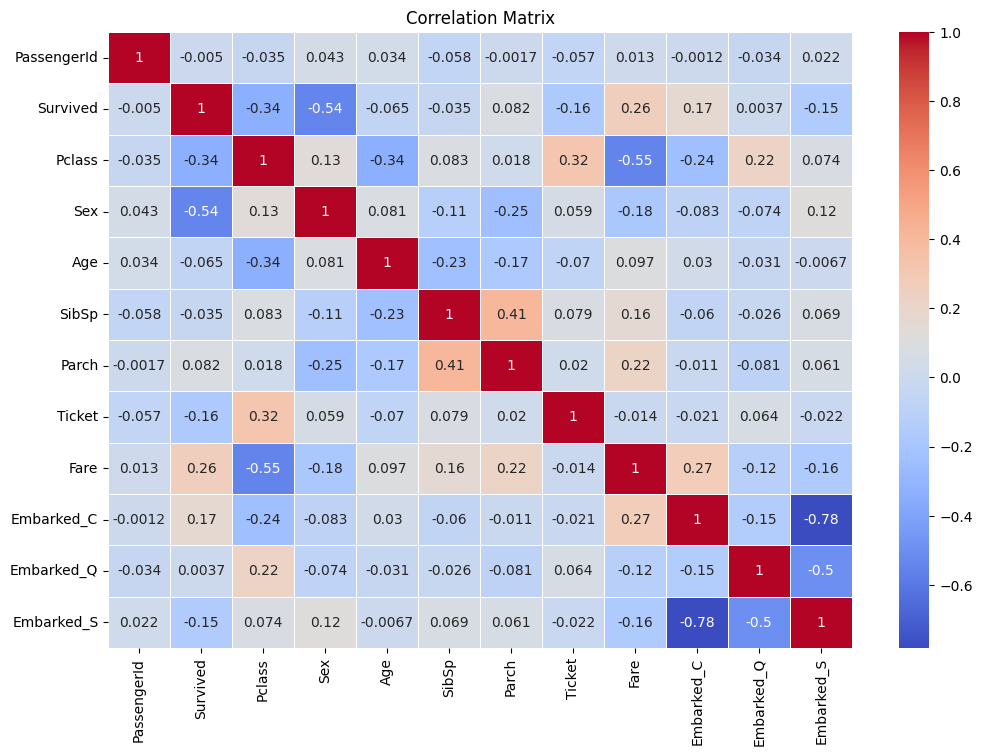

In [27]:
import numpy as np
plt.figure(figsize=(12,8))
corr=df.corr(numeric_only=True)
sns.heatmap(corr , annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

## **Inference :**
Features with strong correlation to Survived (like Sex, Pclass, Fare) are important predictors.

Features that are strongly correlated with each other (like SibSp and Parch)  can be redundant.

1.Sex	(-0.54)	Strong negative — females
      were more likely to survive

2.Fare (+0.26)	Positive — higher fare =
      higher chance of survival

3.Pclass (-0.34)	Lower class (like 3rd class passengers)
        lower chance of survival

4.Embarked_C (+0.17)	Slight positive —
            port of embarkation has some effect

5.Age	(-0.065)Weak negative — older
        passengers slightly less likely to survive


In [28]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1           # created FamilySize column beacuse SibSp and Parch are strongly correlated found from the correlation matrix,ie if two features are very strongly correlated, they can introduce multicollinearity.
df.head(10)
#so we can basically remove Parch and SibSp ,but for now it will not be removed,as i will testing it with the models and check which would impact more on the survival rate

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,1,-0.565736,1,0,523,-0.502445,0,0,1,2
1,2,1,1,0,0.663861,1,0,596,0.786845,1,0,0,2
2,3,1,3,0,-0.258337,0,0,669,-0.488854,0,0,1,1
3,4,1,1,0,0.433312,1,0,49,0.420730,0,0,1,2
4,5,0,3,1,0.433312,0,0,472,-0.486337,0,0,1,1
5,6,0,3,1,-0.104637,0,0,275,-0.478116,0,1,0,1
6,7,0,1,1,1.893459,0,0,85,0.395814,0,0,1,1
7,8,0,3,1,-2.102733,3,1,395,-0.224083,0,0,1,5
8,9,1,3,0,-0.181487,0,2,344,-0.424256,0,0,1,3
9,10,1,2,0,-1.180535,1,0,132,-0.042956,1,0,0,2


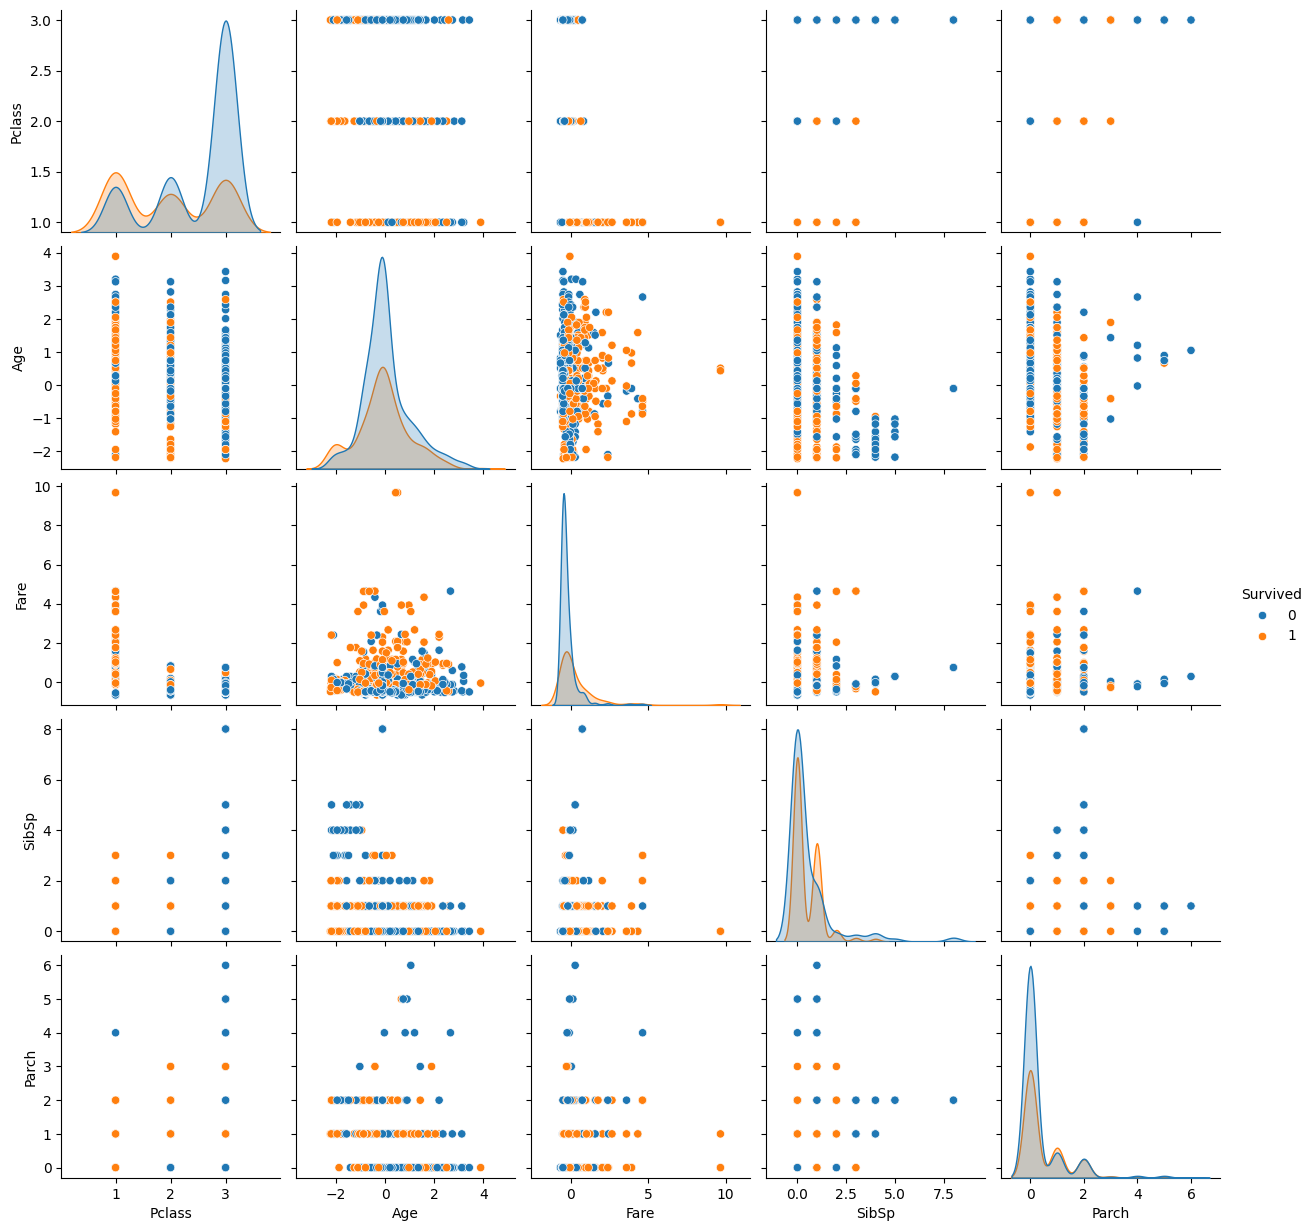

In [29]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()

## **Inference** :
Higher class (Pclass = 1) passengers were more likely to survive.

Higher fares were associated with higher survival (maybe due to better cabins).

Survivors are more concentrated in certain age/fare/class clusters — middle-aged, higher class, higher fare.

Family members aboard (SibSp, Parch) slightly influence survival, but not as strongly as class/fare.

